**We would like to predict weight of new born child based on historical data. **

More about dataset: https://bigquery.cloud.google.com/table/bigquery-public-data:samples.natality

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Exercise 1**

Get all columns from data set which is in file 'natality/natality_v2.csv'

In [20]:
natality = pd.read_csv('natality/natality_v2.csv')

** Exercise 2**

List all columns and their nullity 

In [21]:
natality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
source_year               1000000 non-null int64
year                      1000000 non-null int64
month                     1000000 non-null int64
day                       0 non-null float64
wday                      1000000 non-null int64
state                     704668 non-null object
is_male                   1000000 non-null bool
child_race                400913 non-null float64
weight_pounds             999155 non-null float64
plurality                 1000000 non-null int64
apgar_1min                400913 non-null float64
apgar_5min                899997 non-null float64
mother_residence_state    704636 non-null object
mother_race               825855 non-null float64
mother_age                1000000 non-null int64
gestation_weeks           991013 non-null float64
lmp                       1000000 non-null int64
mother_married            1000000 non-null bool
mother

** Exercise 3**

Get info about percentiles / min / max values

In [23]:
natality.describe().T

,count,mean,std,min,25%,50%,75%,max
source_year,1000000.0,2.003458e+03,2.060950e+00,2.001000e+03,2.002000e+03,2.003000e+03,2.005000e+03,2.008000e+03
year,1000000.0,2.003458e+03,2.060950e+00,2.001000e+03,2.002000e+03,2.003000e+03,2.005000e+03,2.008000e+03
month,1000000.0,6.556591e+00,3.419335e+00,1.000000e+00,4.000000e+00,7.000000e+00,9.000000e+00,1.200000e+01
day,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wday,1000000.0,4.060476e+00,1.843489e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
child_race,400913.0,9.000000e+00,0.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00
weight_pounds,999155.0,7.246549e+00,1.325432e+00,5.004493e-01,6.563162e+00,7.319347e+00,8.062305e+00,1.800074e+01
plurality,1000000.0,1.035269e+00,1.955432e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
apgar_1min,400913.0,9.900000e+01,0.000000e+00,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
apgar_5min,899997.0,1.794034e+01,2.710526e+01,0.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.900000e+01


Methods like **get_distinc_values** are useful to look for possible corelations in terms of our birth weight prediction model. You can see if given feature has impact on weight prediction.

In [24]:

def get_distinct_values(column_name):
    grouped = natality.groupby([column_name]).agg(['mean', 'count'])
    grouped['weight_pounds_avg'] = grouped['weight_pounds']['mean']
    grouped['children_count'] = grouped['weight_pounds']['count']
    without_index = grouped.reset_index()
    to_plot = without_index[[column_name, 'children_count', 'weight_pounds_avg']]
    to_plot.plot(x=column_name, \
                 y='weight_pounds_avg', \
                 kind='bar', \
                 figsize=(18.5, 10.5), \
                 title='weight_avg');
    plt.show()
    to_plot.plot(x=column_name, \
                 y='children_count', \
                 kind='bar', \
                 figsize=(18.5, 10.5), \
                 title='children_count');    

** What is the impact of race on birth weight? how many observations support given race? **

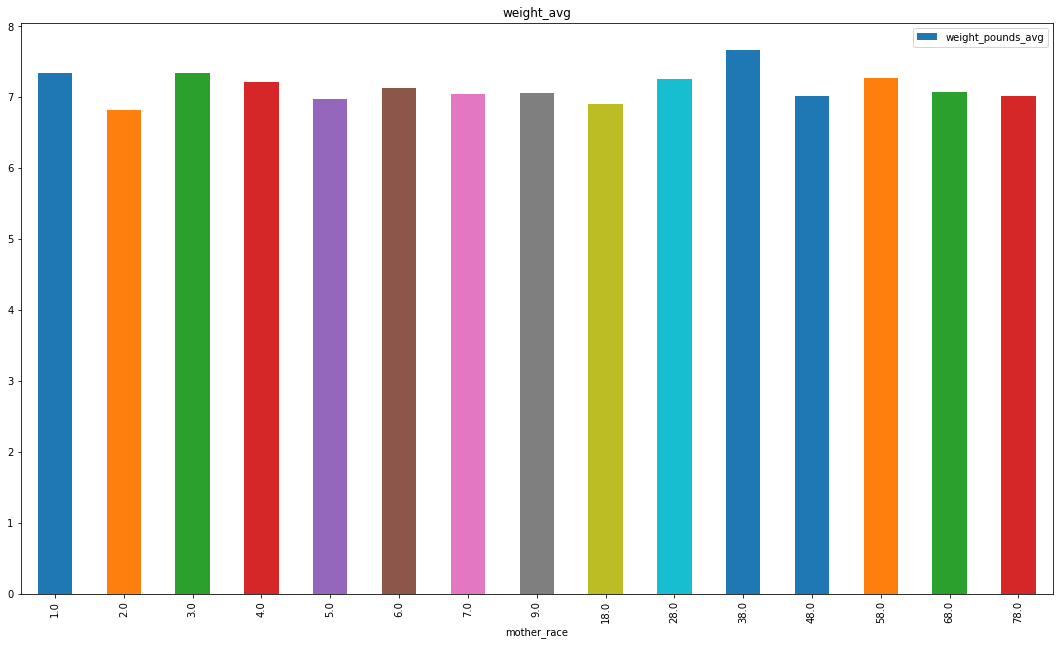

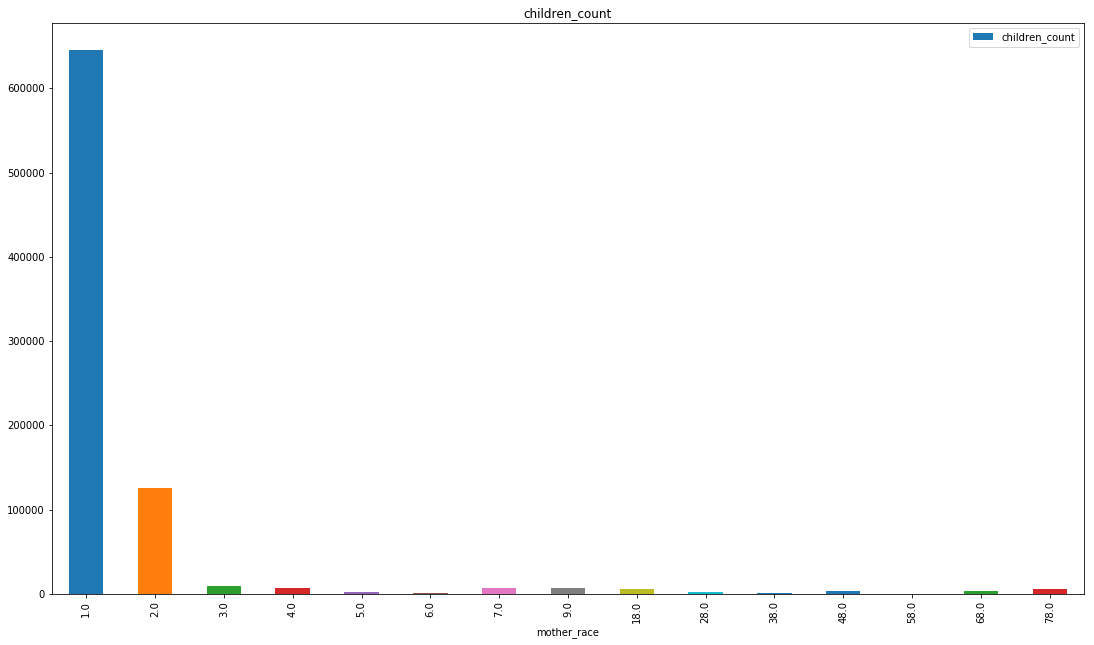

In [7]:
# 1 - White
# 2 - Black
# 3 - American Indian
# 4 - Chinese
# 5 - Japanese
# 6 - Hawaiian
# 7 - Filipino
# 9 - Unknown/Other
# 18 - Asian Indian
# 28 - Korean
# 39 - Samoan
# 48 - Vietnamese

# is mother race relevant for child's weight what other features are relevant / interesting?
get_distinct_values('mother_race')

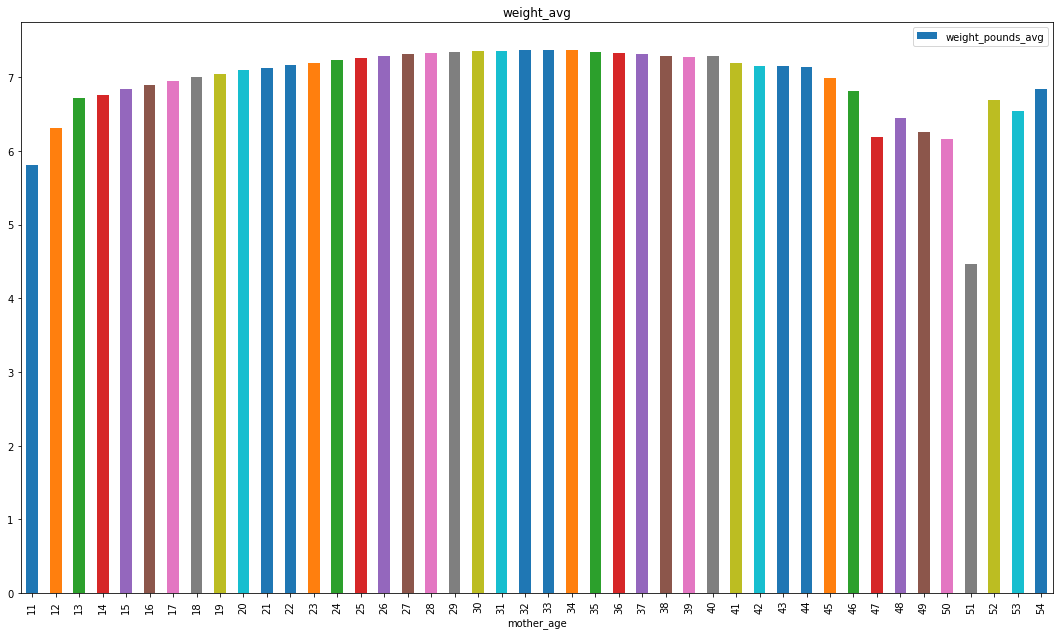

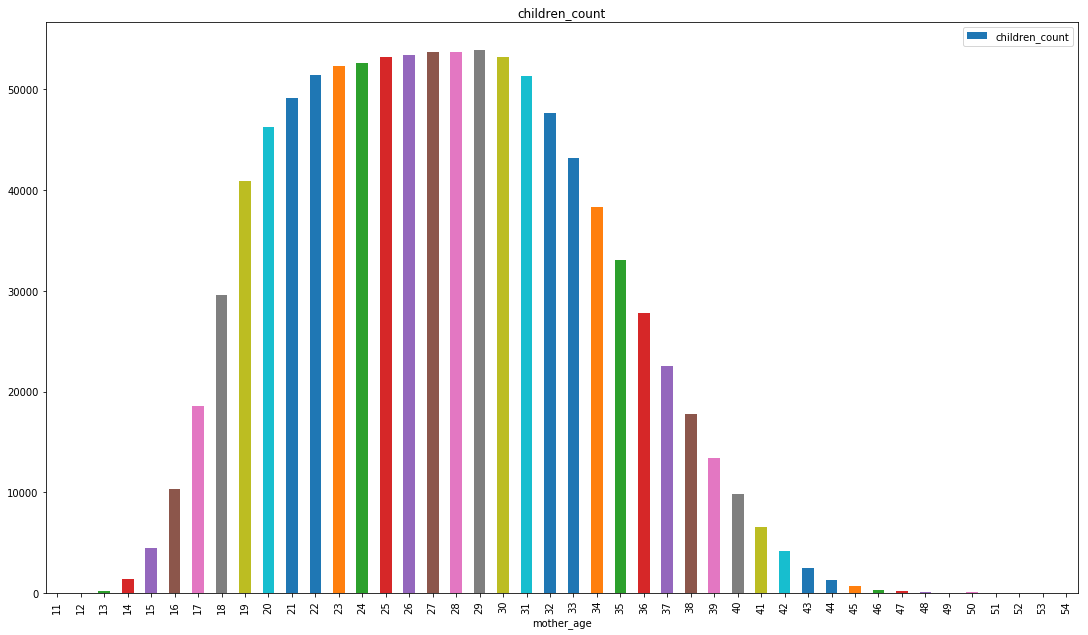

In [8]:
get_distinct_values('mother_age')

**Exercise 4**

Investigate father age in relation to child weight. Can you spot any odd patterns? Should we use all observation during model training? 

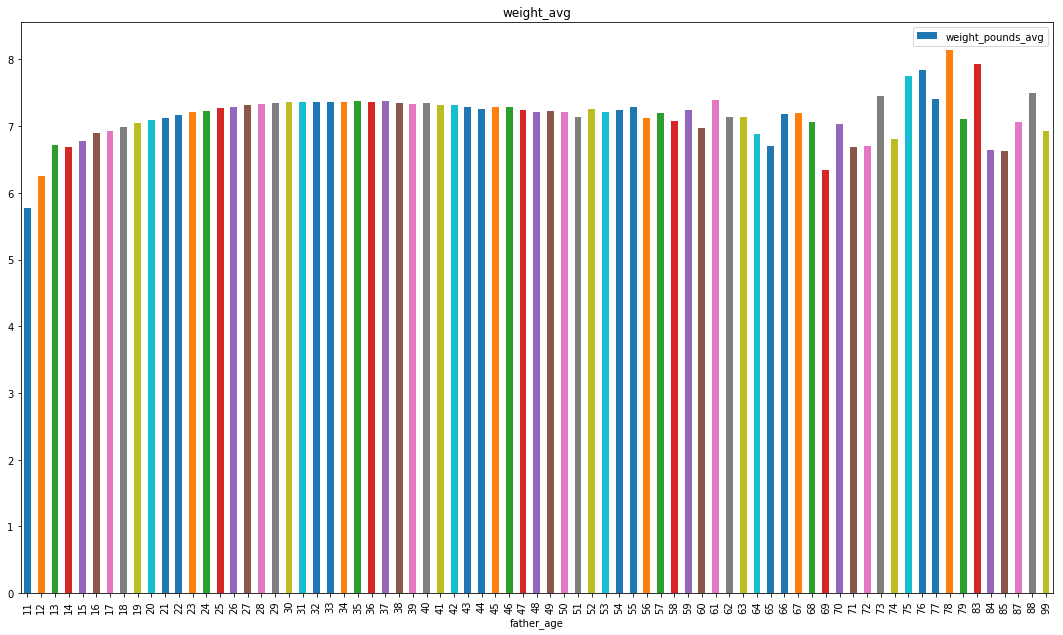

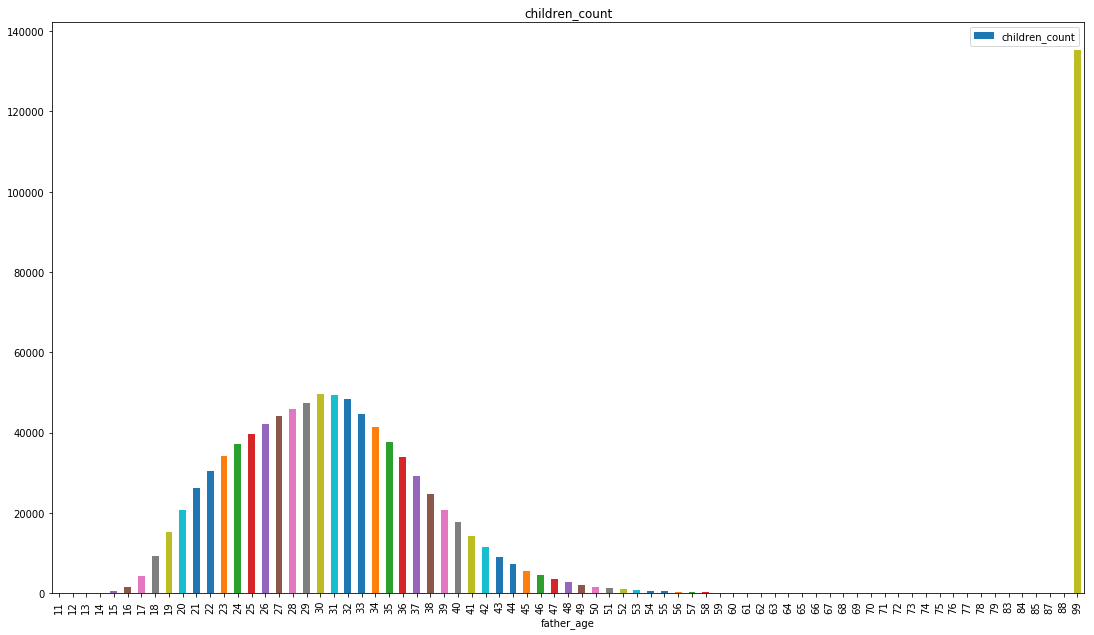

In [25]:
get_distinct_values('father_age')

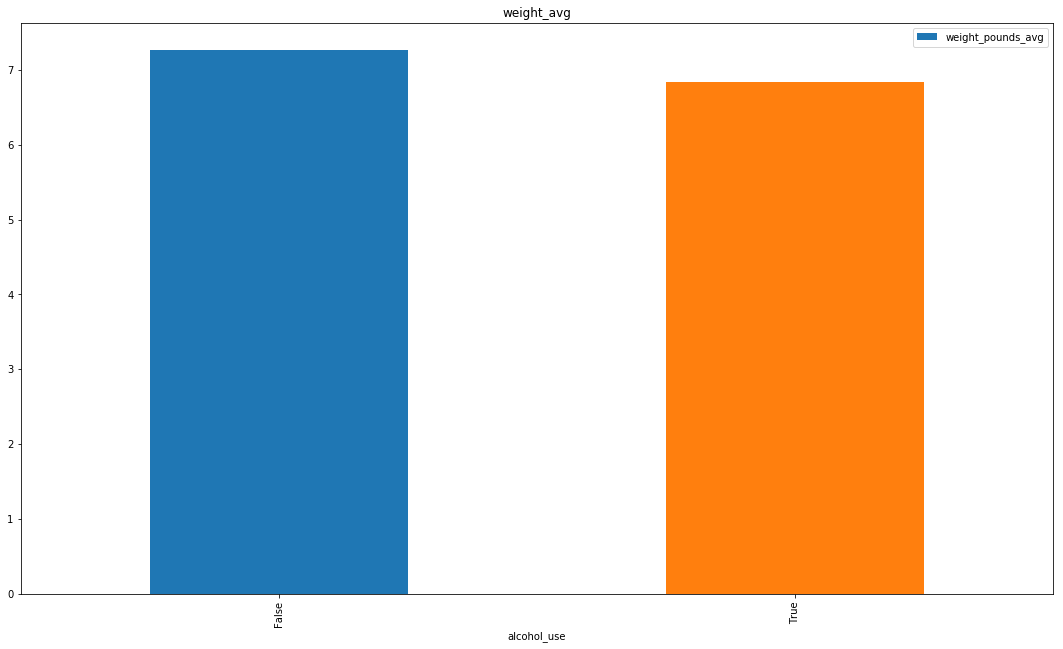

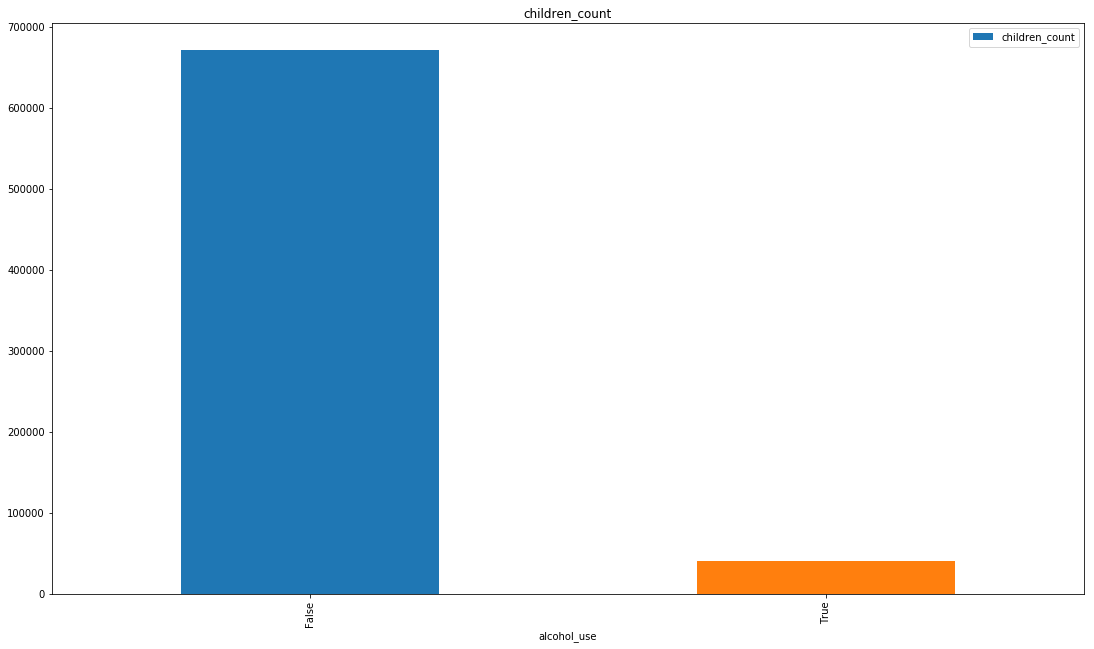

In [10]:
get_distinct_values('alcohol_use')

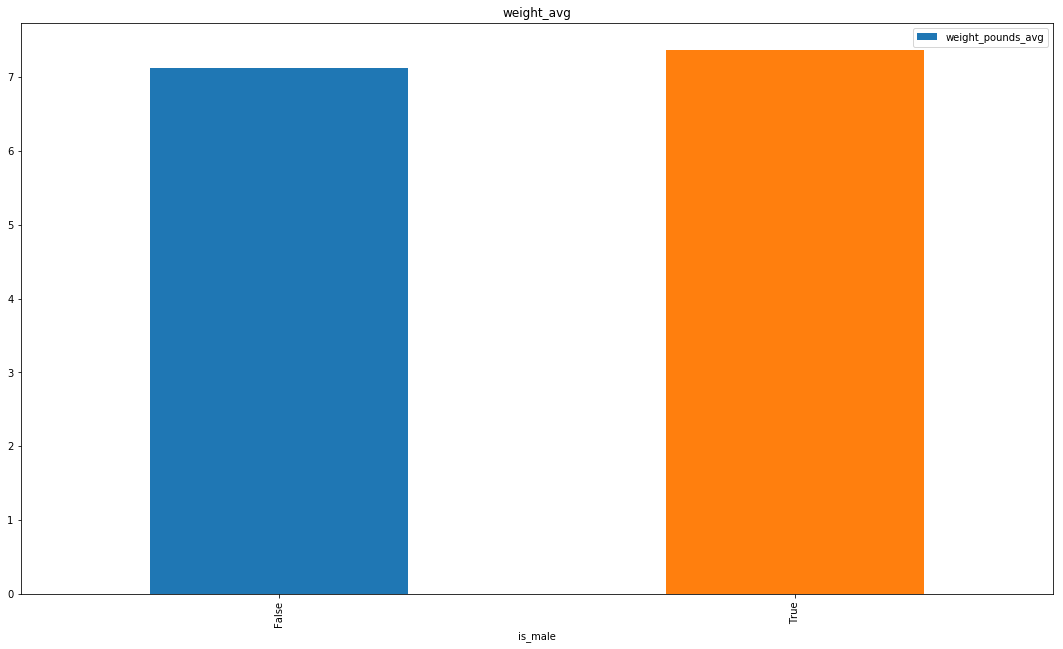

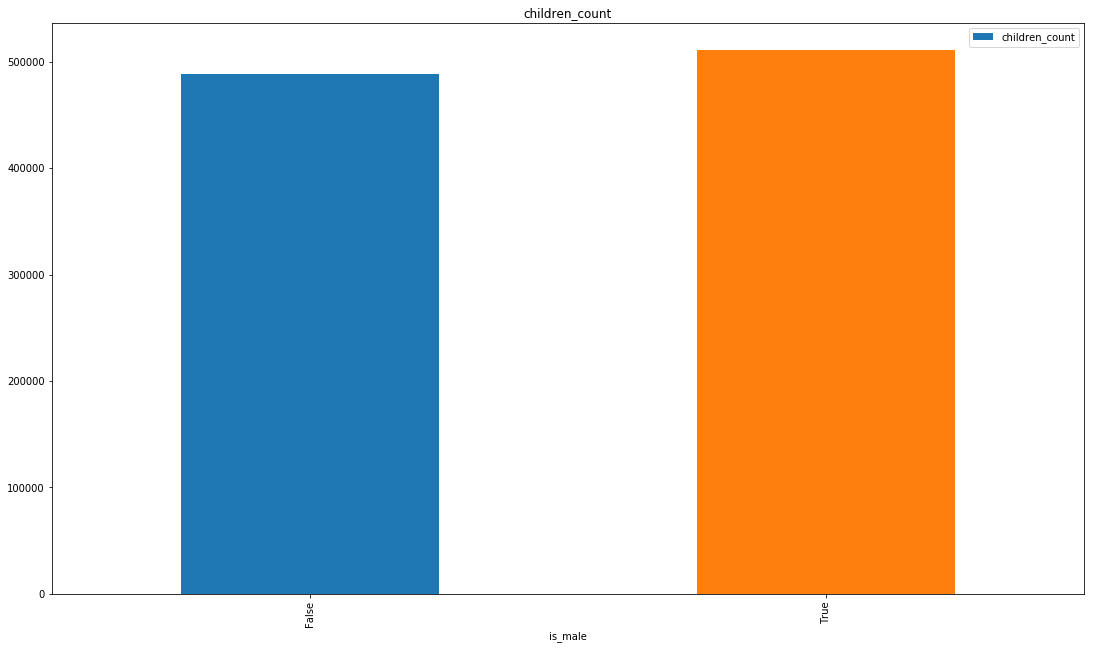

In [11]:
get_distinct_values('is_male')

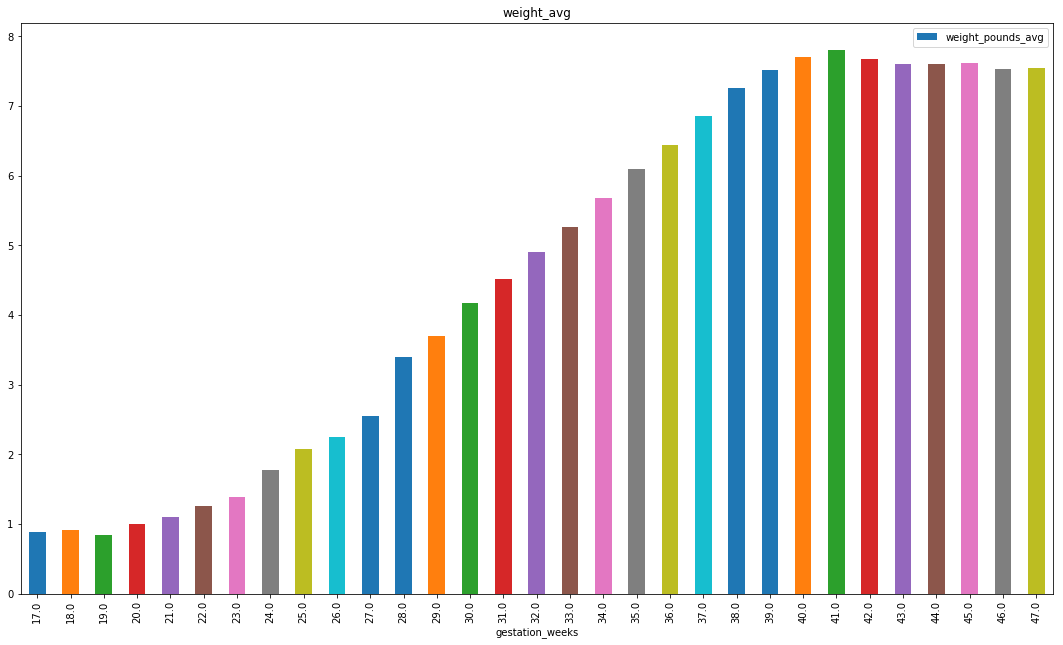

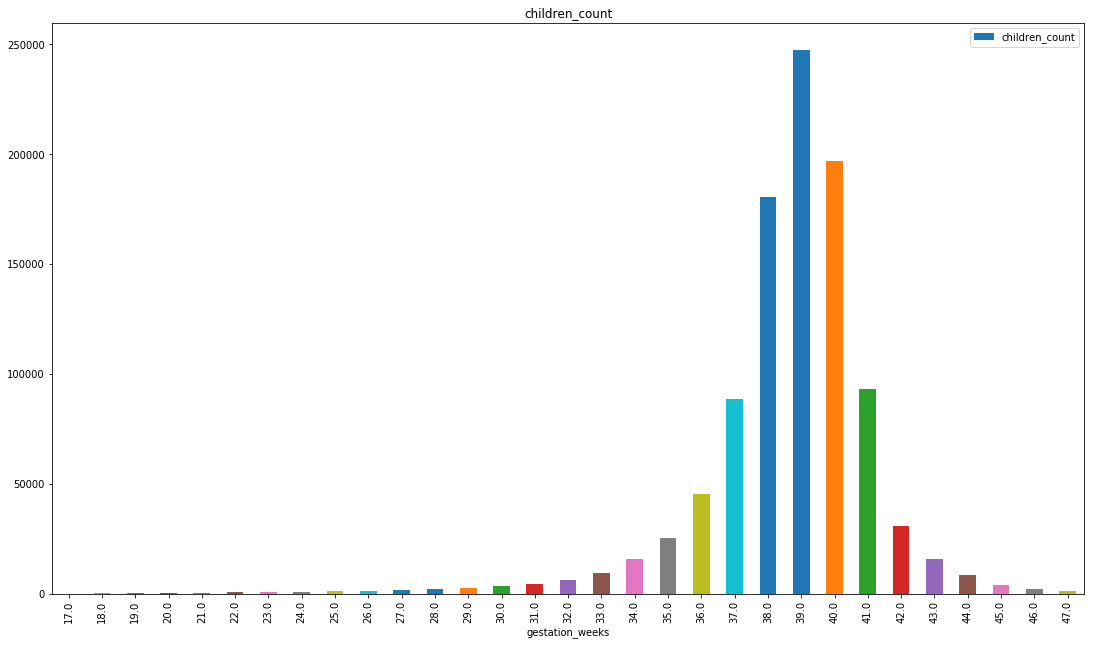

In [12]:
get_distinct_values('gestation_weeks')

Not all data might be present. **Should we remove Nans?**

In [13]:
natality['cigarette_use']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
          ...  
999970    False
999971    False
999972      NaN
999973      NaN
999974     True
999975    False
999976     True
999977      NaN
999978      NaN
999979      NaN
999980      NaN
999981      NaN
999982    False
999983      NaN
999984    False
999985    False
999986      NaN
999987    False
999988    False
999989    False
999990    False
999991    False
999992    False
999993      NaN
999994      NaN
999995    False
999996     True
999997    False
999998    False
999999      NaN
Name: cigarette_use, Len

In [11]:
natality['cigarette_use'].value_counts()

False    330917
True      38186
Name: cigarette_use, dtype: int64

In [12]:
len(natality['cigarette_use'])

1000000

** Exercise 5. **

Investigate alcohol_use does it contain NaNs also?

In [ ]:
# TBD

Clean data and leave only features relevant to predict weight_pounds based on our analysis

In [18]:
natality_filtered = natality[[ 'weight_pounds', 'is_male', 'mother_age',\
                                'mother_race', 'plurality', 'gestation_weeks',\
                                'mother_married','ever_born', 'cigarette_use', \
                                'alcohol_use']] \
                            .query('(cigarette_use == True) or (cigarette_use == False)') \
                            .query('(alcohol_use == True) or (alcohol_use == False)') 
    
natality_filtered.head()

,weight_pounds,is_male,mother_age,mother_race,plurality,gestation_weeks,mother_married,ever_born,cigarette_use,alcohol_use
1661,8.000575,False,44,1.0,1,38.0,True,2.0,False,False
2595,8.437091,False,20,1.0,1,31.0,True,1.0,False,False
2634,6.375769,True,26,1.0,1,39.0,False,3.0,True,True
2650,8.124034,True,22,1.0,1,39.0,False,2.0,False,False
2651,9.124933,True,23,1.0,1,40.0,True,4.0,False,False


Create train and test datasets - sklearn has a lot of convience methods to work with training data. ***do you know why we need to separate training and test data?***

In [15]:
train=natality_filtered.sample(frac=0.8,random_state=200)
test=natality_filtered.drop(train.index)

In [16]:
# save test and train as csvs
# train.to_csv('natality-train.csv', index=False, header=False)
train.to_csv('natality-train.csv')
test.to_csv('natality-test.csv')

In [17]:
# think of a simplest model for predicting child birth weight -
# we can use average child weight as a prediction and calculate RMSE on test and train dataset

def compute_rmse(actual, predicted):
  return np.sqrt(np.mean((actual-predicted)**2))

def print_rmse(df, prediction, name):
  print("{1} RMSE = {0}".format(compute_rmse(df['weight_pounds'], prediction), name))

df_train = pd.read_csv('natality-train.csv')
df_test = pd.read_csv('natality-test.csv')

# let's use average weight from training set
prediction = df_train['weight_pounds'].mean()

print("Prediction  = {0} pounds".format(prediction))
print_rmse(df_train, prediction, 'Train')
print_rmse(df_test, prediction, 'Test') 

Prediction = 3.623449716529607 kg
Train RMSE = 1.3241961939478655
Test RMSE = 1.3228989690142228
